In [64]:
import os, fnmatch
import numpy
from PIL import Image
import csv
import gdal
import matplotlib.pyplot as plt


file = '/Users/gjmacdonald/Documents/Sea Ice Project/SIC_AMSR2/2020masked/clip_asi-AMSR2-s3125-20201001-v5.4.tif'
image = Image.open(file)
SICOct1 = numpy.array(image) #Oct 1

#x= 
#data = x.ReadAsArray()

dataset= gdal.Open('/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/Masked/HeatFlux1Oct_Extent.tif')
HeatFluxAll = dataset.ReadAsArray()
Oct1HF = HeatFluxAll[0,:,:] #Day 1 = index
#Nodata value = 9.969209968386869e+36

# Iceproduction = 84600*(3.125*3.125) * (1-SIC) * heatflux / 920 * (2.79*10^5)  check units of area

#SIC divded by two as is out of 200, and by 100 to make decimal. Check this for polynya area too!


#Iceproduction = 84600*(3.125*3.125)*(1-(SICOct1/2/100)*Oct1HF/920*(2.79*10**5)


                                     #Iceproduction = 84600*(3.125*3.125)*(1*Oct1HF/920*(2.79*10**5)

#Some random tab problem if continue in this cell

#Cheng did 0.75 but I did 0.75 for polynya area. Reasses
        #A[(A>5)&(A<10)]



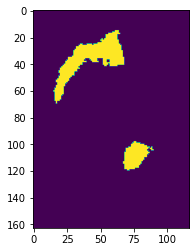

In [84]:
#Conveluted way of making values that are 0 to 0.7 = to 1, and all values >0.7 incl nodata = 0

Iceproduction = 84600*(3.125*3.125)*(1-(SICOct1/2/100)*Oct1HF/(920*(2.79*10**5))) #careful with brackets here especially after division
SICOct1_mask = SICOct1/2/100 #bc scaled
SICOct1_mask[SICOct1_mask == 0] = 0.1                                     
SICOct1_mask[SICOct1_mask > 0.7] = 0 
SICOct1_mask[(SICOct1_mask <= 0.7)&(SICOct1_mask>0)] = 1 
#Cheng did 0.75 but I did 0.75 for polynya area. Reasses

Iceproduction1Oct = SICOct1_mask*Iceproduction
plt.imshow(Iceproduction1Oct)
#Iceproduction1Oct[35,50] #824675491123.1085 823782665817.1965 823782.6658171966



In [246]:
##Try to loop through october. Above works for one day
##Seems to work - apart from misses last day, and may want to check if right since looks lower where less ice
#THE REASON IT IS GOING WRONG IS THE HEATFLUX DATA IS LOADING AS NONSENSE DATA. BUT THE FILE IS OKAY. SOME PROBLEM WITH LOADING
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

outputfolder ='/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/IceProducTifsOctTest/'
path = '/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/SIC_OctTest/'  
noOfImages = 31 #no of images +1

dataset= gdal.Open('/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/Masked/HeatFlux1Oct_ExtentSat.tif')
HeatFluxAll = dataset.ReadAsArray()
#Nodata value
#Oct1HF = HeatFluxAll[0,:,:]


file_list2 = [x for x in sorted([x for x in os.listdir(path)])]
thing = '.DS_Store' #Hidden file that occurs. 
image_frames = []
days = np.arange(1,noOfImages)#Should this be 0?

for k in days:
    if k == days.shape[0]: #day.shape[0] gets the last index of shape, which breaks it. 
        break
    image = Image.open(path + file_list2[(days[k]-1)]) #Cycles through file list. 0-1 because index starts at 0 
    Y = np.array(image)
    Y = Y.astype("float") #Necessary to convert to Nan
    #Y[Y == 255] = np.nan #Convert nodata to NaN
    #Z = Y/2 # Because SIC are doubled in this resolution of dataset
    ##Get Heatflux
    Heatflux = HeatFluxAll[k-1,:,:] #assuming start from first band. k-1 cos first band indexed as 0, k starts at 1
    Iceproduction = (3125*3125)*(1-(Y/2/100))*Heatflux/(920*(2.79*10**5)) #Removed 84600* (seconds in day)
    # Try an example pixel of HeatFluxValue 25135448
    
    ##Make mask from SIC #Conveluted way of making values that are 0 to 0.7 = to 1, and all values >0.7 incl nodata = 0
    SICO_mask = Y/2/100
    SICO_mask[SICO_mask == 0] = 0.1 
    SICO_mask[SICO_mask > 0.7] = 0 
    SICO_mask[(SICO_mask <= 0.7)&(SICO_mask>0)] = 1  
    
    ##Apply mask to iceproduction
    Iceproduction = SICO_mask*Iceproduction
    
    #Just to print and look
    Iceproduction[Iceproduction == -4.83591813831807e+35] = 0

    x = np.sum(Iceproduction)
    print(x)

    
    plt.figure(figsize=(10,10), dpi= 90)
    plt.imshow(Iceproduction, interpolation='none', cmap='jet')#,vmin=70, vmax=100
    plt.colorbar()
    plt.title('Ice production '+file_list2[k-1][21:29]); #K-1 because of indexing starting at 0. Otherwise titles from 2nd date
    plt.savefig(outputfolder+file_list2[k-1][:-4]+'.tif')#The -4 omits the tif part from file name for jpeg
    plt.close() #try to stop printing all in notebook

1254933374.5530365
1614350878.176149
877286107.7067628
755893521.3524318
467997608.63059366
1368833215.3784473
1522214808.3364837
1088192577.7548134
1172962766.664186
716290086.0377891
671709931.7570455
787717619.1761599
622466563.6052338
697482967.4381769
372255751.77735287
78580369.65257081
256493990.2066776
160231790.03776896
646006859.651898
403790850.6784652
658582064.0159013
717864531.8728117
415685715.2399601
987548487.8708867
365854194.4827947
479552028.9893118
513115960.23661816
648412302.4085499
996440937.5650585


In [117]:
##Write total productions to file
## NEED TO FIX THIS. THIS DOESN'T CURRENTLY WORK. I THINK IT'S BECAUSE OF COLORBAR AND OTHER INFO ADDED TO TIFS
#STOP GAP IS RUN TO CREATE FILE BUT RPELACE VALUES FROM PRINTS ABOVE SCRIPT
#ONE SOLUTION IS NOT ADD EXTRAS TO TIFFS, ADD COLORBARS LATER IF NEEDED ON SEPARATE BATCH
#IDEAL PERHAPS IS TO WRITE TO FILE AS PART OF ABOVE SCRIPT'S FOR LOOP



import glob as glob

in_directory = "/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/IceProducTifsOctTest/" #set folder with tifs

file_list2 = [x for x in sorted([x for x in os.listdir("/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/IceProducTifsOctTest/")])]
thing = '.DS_Store' #Hidden file that occurs. Have to do this for any other non-tiff files
while thing in file_list2: file_list2.remove(thing)    

myfile = open('2020_OctTest_Iceproduction.csv', 'w') #set name
myfile.write('filename' + ',' + 'ice production (units?)'+'\n') #Add headers
for file in file_list2:
    (infilepath, infilename)= os.path.split (file)
    image = Image.open(in_directory+file)
    array = numpy.array(image)
    array = array.astype("float")
    
    #polynyaPixels = (array < 70).sum()
    #AreaKm2 = (3.125*3.125)*polynyaPixels #Resolution of pixels * no of pixels
    TotalDailyIceProduction = np.sum(array) #Resolution of pixels * no of pixels. Need to address resolution here, or I think not cos addressed earlier in calc
    print(TotalDailyIceProduction)

    #Need to do area calculation
    #print(polynyaPixels)
    myfile.write(infilename + ',' + str(TotalDailyIceProduction)+'\n')
    #Write filename and number to file
                             
myfile.close() #Note I think file saves where script is saved

490576765.0
491438861.0
490896659.0
490251457.0
488907204.0
491658843.0
494567468.0
491725072.0
493143600.0
490091755.0
489653343.0
490726945.0
489622649.0
490101988.0
488507017.0
486222815.0
487450220.0
486664655.0
489126117.0
488277197.0
488882633.0
489680727.0
488236778.0
491565256.0
487829474.0
488383352.0
488675090.0
488211484.0
489649571.0


In [115]:
test = Image.open(in_directory+file)
array = numpy.array(image)

In [120]:
array.shape

(900, 900, 4)

In [134]:
#Open A and make raster
path2 = '/Users/gjmacdonald/Documents/Sea Ice Project/SIC_AMSR2/2020masked/'
StackEx= gdal.Open(path2+'clip_asi-AMSR2-s3125-20200302-v5.4.tif')
StackEx2 = StackEx.ReadAsArray()

#Open B and make raster



In [135]:
StackEx2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

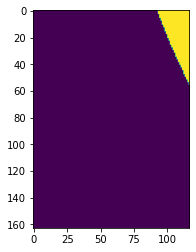

In [153]:
dataset= gdal.Open('/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/Masked/HeatFlux1Oct_ExtentSat.tif')
HeatFluxAll_99 = dataset.GetRasterBand(1).ReadAsArray()


BIGTEST2 = HeatFluxAll_99[:,:]
plt.imshow(BIGTEST) #so something is going wrong with loading the multiband tiff
#BIGTEST2[30,50] = 25946112.0


In [175]:
dataset= gdal.Open('/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/Masked/HeatFlux1Oct_ExtentSat.tif')
BIGTEST1 = dataset.ReadAsArray()
#BIGTEST1

In [168]:
#BIGTEST2[30,50]
BIGTEST1[4,0,100]

9.969209968386869e+36

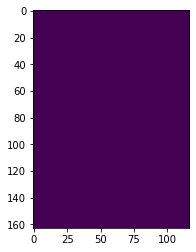

In [174]:
BIGTEST1[BIGTEST1 == 9.969209968386869e+36] = 0                                     
plt.imshow(BIGTEST1[1,:,:],vmin = 25946112.0, vmax= 2594611200)# ,vmin=70, vmax=100

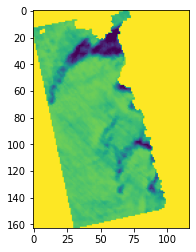

In [165]:
plt.imshow(Y/2/100)

In [201]:
Shearer = (3125*3125)*(1-(0)*25946112/(920*(2.79*10**5)))#25946112 #1-(Y/2/100)
Beardsley = SICO_mask*Shearer

In [237]:
#plt.imshow(Beardsley)
#plt.imshow(SICO_mask,vmin=1000, vmax=1000000000000000)
Iceproduction[20,55]

9765625.0

In [197]:
Cole = Y/2/100
Cole[20,55]
print(1-0/2/100)

1.0


In [213]:
#6352237.172744272
#976562.5# In polynya  -- no mask.  Beardsley[20,55]
SICO_mask[60,15]

1.0

In [211]:
SICO_mask = Y/2/100
SICO_mask[SICO_mask == 0] = 0.1 
SICO_mask[SICO_mask > 0.7] = 0 
SICO_mask[(SICO_mask <= 0.7)&(SICO_mask>0)] = 1 

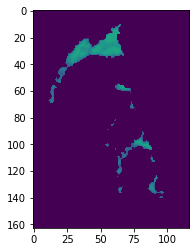

In [242]:
plt.imshow(Iceproduction,vmin=8000000, vmax=10999995)
#Dave = Iceproduction[1,60,15]
#print(Dave)

In [243]:
#Iceproduction[Iceproduction == -4.83591813831807e+35] = 0

Iceproduction[20,60]

9765625.0

In [222]:
Iceproduction[0,100]

-4.83591813831807e+35

In [247]:
#last day total 
np.sum(SICO_mask)
#1136.0
#10566694757.450836/1136


1136.0